In [2]:
import pandas as pd
import numpy as np
from scipy import stats

from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [46]:
df = pd.read_csv('goodreads_final.csv')

In [47]:
df

,author,book_title,genre,pages_amt,price,publish_date,rating_avg,ratings_amt,reviews_amt
0,B.L. Brunnemer,When the Dead Come A Knockin',young-adult,560 pages,Kindle Unlimited\n,January 27th 2017,4.50,5038,282
1,Jeff Wheeler,Mirror Gate,young-adult,348 pages,Kindle Unlimited\n,August 28th 2018,4.37,7258,365
2,Marie Rutkoski,The Winner's Crime,young-adult,416 pages,Amazon UK,March 3rd 2015,4.13,52722,7234
3,George M. Johnson,All Boys Aren't Blue,young-adult,320 pages,Amazon,April 28th 2020,4.31,222,74
4,Jeff Wheeler,Broken Veil,young-adult,346 pages,Kindle Unlimited\n,June 11th 2019,4.47,4603,328
...,...,...,...,...,...,...,...,...,...
2689,Nathan W. Pyle,Strange Planet,art,144 pages,Kindle Store\n$10.99\n,November 19th 2019,4.36,14967,1224
2690,"Anna Kang,Christopher Weyant",Eraser,art,21 pages,Kindle Unlimited\n,September 1st 2018,3.88,6832,307
2691,Rebecca Makkai,The Great Believers,art,448 pages,Amazon,June 4th 2019,4.21,61802,6042
2692,Jeffrey Archer,Nothing Ventured,art,320 pages,Amazon UK,September 3rd 2019,3.97,9269,965


In [48]:
df['pages_amt'] = df['pages_amt'].str.strip(" pages")


In [49]:
df["pages_amt"] = pd.to_numeric(df["pages_amt"])

In [50]:
df["publish_date"] = pd.to_datetime(df["publish_date"])

In [51]:
group = df.groupby('genre')

In [52]:
group.size()

genre
art                   100
biography             100
business              100
christian             100
classics              100
comics                100
cookbooks             100
fantasy               100
fiction               100
graphic-novels         99
historical-fiction     99
history                99
horror                 99
memoir                100
music                 100
mystery                99
non-fiction           100
poetry                100
psychology            100
romance               100
science               100
science-fiction       100
self-help             100
sports                100
thriller               99
travel                100
young-adult           100
dtype: int64

In [53]:
group.rating_avg.mean()

genre
art                   3.963300
biography             4.116400
business              4.101800
christian             4.191100
classics              4.008500
comics                4.247800
cookbooks             3.979200
fantasy               4.206900
fiction               4.074400
graphic-novels        4.240808
historical-fiction    4.157778
history               4.208384
horror                4.024646
memoir                4.143000
music                 4.129400
mystery               4.096061
non-fiction           4.088100
poetry                4.085200
psychology            4.047100
romance               4.194800
science               4.089300
science-fiction       4.163100
self-help             4.079000
sports                4.147600
thriller              4.008889
travel                3.902900
young-adult           4.179500
Name: rating_avg, dtype: float64

In [54]:
group.rating_avg.std()

genre
art                   0.269174
biography             0.280963
business              0.233058
christian             0.278052
classics              0.196800
comics                0.301336
cookbooks             0.273768
fantasy               0.291675
fiction               0.263352
graphic-novels        0.306143
historical-fiction    0.258455
history               0.229461
horror                0.217572
memoir                0.282126
music                 0.252490
mystery               0.284141
non-fiction           0.345045
poetry                0.300573
psychology            0.257644
romance               0.298405
science               0.248565
science-fiction       0.311859
self-help             0.276521
sports                0.225564
thriller              0.232844
travel                0.285715
young-adult           0.239378
Name: rating_avg, dtype: float64

In [69]:
group.ratings_amt.max()

genre
art                     61802
biography              641702
business               135373
christian              156667
classics              4297605
comics                  99782
cookbooks               16749
fantasy                648059
fiction               1976468
graphic-novels          55932
historical-fiction     713578
history                373744
horror                 200773
memoir                 641702
music                   36149
mystery                713578
non-fiction            641702
poetry                 120748
psychology             450079
romance                510847
science                206677
science-fiction        159900
self-help              450079
sports                 120709
thriller              1976468
travel                  58852
young-adult            648059
Name: ratings_amt, dtype: int64

In [70]:
import seaborn as sns
from scipy.stats import pearsonr

sns.set()
g=sns.lmplot(x='rating_avg', y='ratings_amt', col='genre', data=group)
g.set(ylim=(0,group.ratings_amt.max()))

IndexError: Column(s) ['genre', 'rating_avg', 'ratings_amt'] already selected

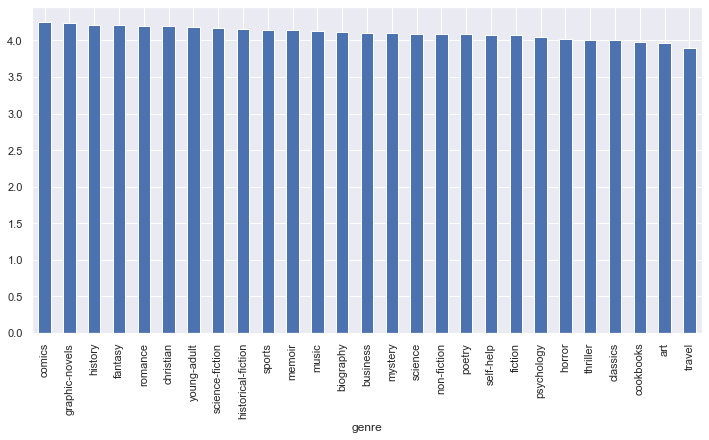

In [55]:
plt.figure(figsize=(12,6))
df.groupby('genre')['rating_avg'].mean().sort_values(ascending=False).plot.bar(color='b')

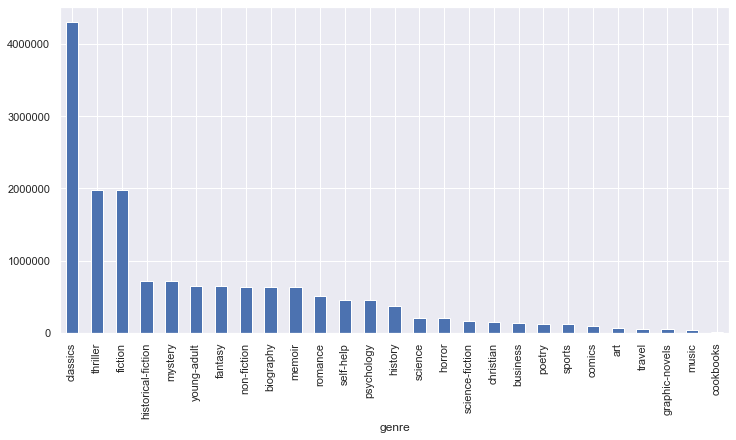

In [77]:
plt.figure(figsize=(12,6))
df.groupby('genre')['ratings_amt'].max().sort_values(ascending=False).plot.bar(color='b')

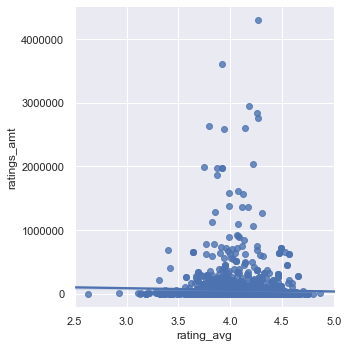

In [64]:

sns.set()


sns.lmplot(x='rating_avg', y='ratings_amt', data=df)


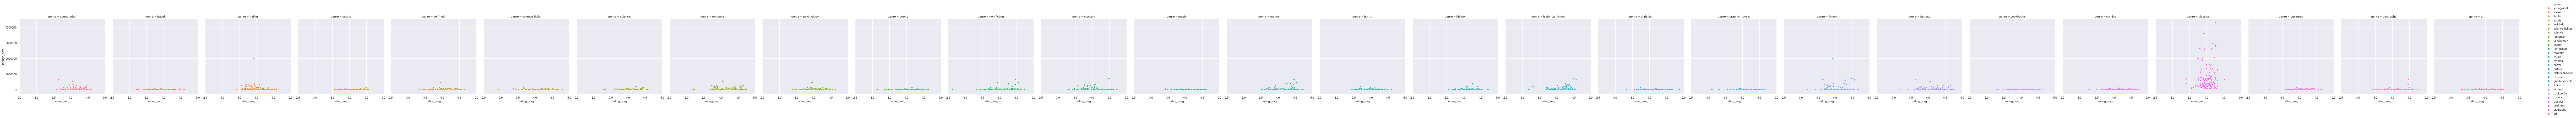

In [65]:
sns.relplot(x='rating_avg', y='ratings_amt', hue='genre', col='genre', data=df)



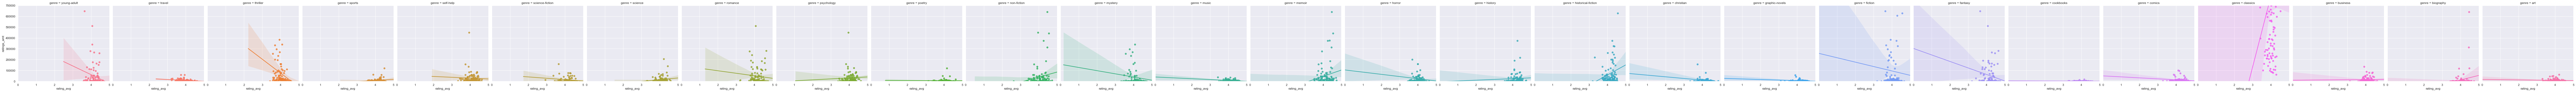

In [78]:
g = sns.lmplot(x='rating_avg', y='ratings_amt', hue='genre', col='genre', data=df)
g.set(ylim=(0,700000))
g.set(xlim=(0,5))

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


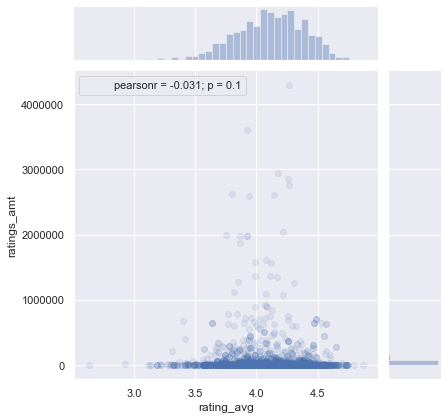

In [80]:
sns.jointplot(x='rating_avg', y='ratings_amt', data=df, alpha = 0.1, stat_func=pearsonr)

In [81]:
from scipy.stats.stats import pearsonr

pearsonr(df.rating_avg, df.ratings_amt)

(-0.03136420718926621, 0.10361713934534016)

In [88]:
#Country[Country['country']!='Australia' ]
psych = df[df['genre']=='classics']
pearsonr(psych.rating_avg, psych.ratings_amt)

(0.15613986496845728, 0.12083003223524488)

In [91]:
#stats.f_oneway(df['libido'][df['dose'] == 'high'], 
#             df['libido'][df['dose'] == 'low'],
#             df['libido'][df['dose'] == 'placebo'])

comics = df[df['genre']=='comics']
travel = df[df['genre']=='travel']
stats.f_oneway(comics['rating_avg'],
               travel['rating_avg'])

F_onewayResult(statistic=68.98555600302849, pvalue=1.5433462636195644e-14)